In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("preprocessed_with_features_rond1000.csv")

In [6]:
data.head()

,Unnamed: 0,phone_number,price,status,city_0,city_1,city_2,city_3,city_4,city_5,...,last_10000,million,area_code_0,area_code_1,area_code_2,area_code_3,area_code_4,area_code_5,first_three,last_four
0,0,9126988709,10250000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,698.0,8709.0
1,1,9126720962,11500000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,672.0,962.0
2,2,9125386732,11150000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,538.0,6732.0
3,3,9127947800,17600000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,794.0,7800.0
4,4,9122169146,27700000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,216.0,9146.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        37802 non-null  int64  
 1   phone_number      37802 non-null  object 
 2   price             37802 non-null  float64
 3   status            37802 non-null  int64  
 4   city_0            37802 non-null  int64  
 5   city_1            37802 non-null  int64  
 6   city_2            37802 non-null  int64  
 7   city_3            37802 non-null  int64  
 8   city_4            37802 non-null  int64  
 9   city_5            37802 non-null  int64  
 10  time              37802 non-null  int64  
 11  last_7_sim        37802 non-null  int64  
 12  last_6_sim        37802 non-null  int64  
 13  first_6_sim       37802 non-null  int64  
 14  three_pair_last   37802 non-null  int64  
 15  three_pair_first  37802 non-null  int64  
 16  just_two_num      37802 non-null  int64 

In [8]:
data.drop(['phone_number' , 'Unnamed: 0'] , axis=1 , inplace=True)

In [9]:
data.head()

,price,status,city_0,city_1,city_2,city_3,city_4,city_5,time,last_7_sim,...,last_10000,million,area_code_0,area_code_1,area_code_2,area_code_3,area_code_4,area_code_5,first_three,last_four
0,10250000.0,0,0,0,0,0,0,1,6,0,...,0,0,0,0,0,0,0,1,698.0,8709.0
1,11500000.0,0,0,0,0,0,0,1,6,0,...,0,0,0,0,0,0,0,1,672.0,962.0
2,11150000.0,0,0,0,0,0,0,1,6,0,...,0,0,0,0,0,0,0,1,538.0,6732.0
3,17600000.0,0,0,0,0,0,0,1,6,0,...,0,0,0,0,0,0,0,1,794.0,7800.0
4,27700000.0,0,0,0,0,0,0,1,6,0,...,0,0,0,0,0,0,0,1,216.0,9146.0


In [10]:
y = data.price
X = data.drop(['price'] , axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='price'>

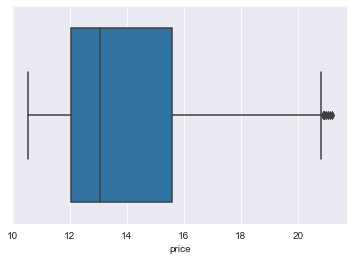

In [18]:
sns.boxplot(y_train)

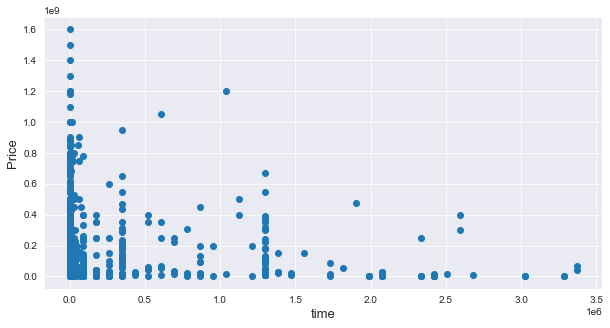

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x = X_train.time, y = y_train)
plt.ylabel('Price', fontsize=13)
plt.xlabel('time', fontsize=13)
plt.show()


 mu = 12156257.46 and sigma = 55849437.97



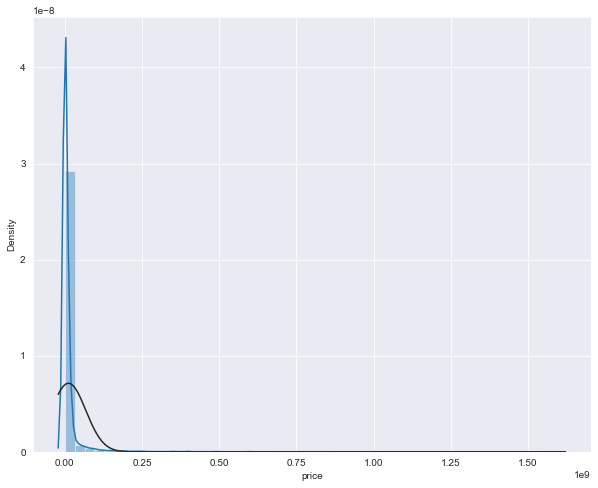

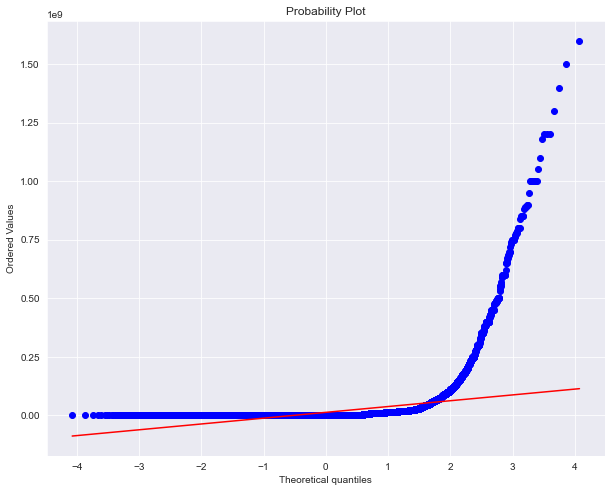

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            #loc='best')
#plt.ylabel('Frequency')
#plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure(figsize=(10,8))
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 1.30 and sigma = 0.04



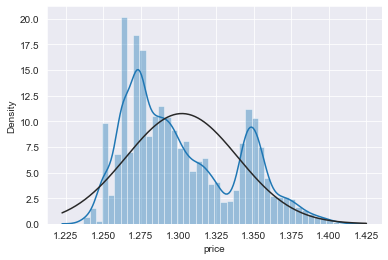

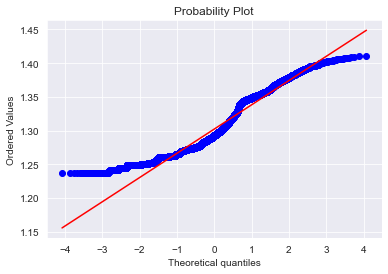

the skewness of price column is:  0.5419708727585076


In [21]:
y_train = np.log1p(y_train)

#Check the new distribution 
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
 #           loc='best')
#plt.ylabel('Frequency')
#plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

print("the skewness of price column is: ",skew(y_train))

<AxesSubplot:>

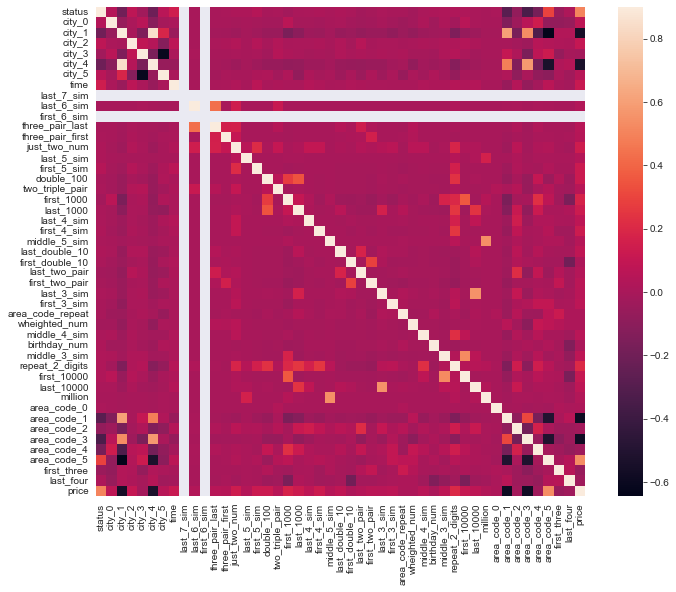

In [15]:
X_train['price'] = y_train
corrmat = X_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
last_6_sim,86.933309
area_code_0,86.933309
million,68.718631
last_5_sim,64.785974
middle_5_sim,45.794231
three_pair_last,41.415858
three_pair_first,33.801125
first_5_sim,18.986404
last_4_sim,17.891258
time,17.221224
